# importing libraries

In [1]:
from sklearn.tree import export_graphviz

In [2]:
import pydotplus
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
iris=datasets.load_iris()


# splitting data into training and testing

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(iris.data,iris.target)
print(xtrain.shape)
print(ytrain.shape)

(112, 4)
(112,)



# creating an object of DecisionTreeClassifier


In [5]:
clf=DecisionTreeClassifier(criterion='entropy')

In [6]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
y_pred=clf.predict(xtest)

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(ytest,y_pred)

array([[17,  0,  0],
       [ 0,  6,  1],
       [ 0,  2, 12]], dtype=int64)

In [10]:
y_train_pred=clf.predict(xtrain)
confusion_matrix(ytrain,y_train_pred)

array([[33,  0,  0],
       [ 0, 43,  0],
       [ 0,  0, 36]], dtype=int64)

# displaying tree and creating pdf for tree

In [11]:
print(export_graphviz(clf,out_file=None))
data1=export_graphviz(clf,out_file=None,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(data1)
graph.write_pdf("iris1.pdf")

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\nentropy = 1.576\nsamples = 112\nvalue = [33, 43, 36]"] ;
1 [label="entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\nentropy = 0.994\nsamples = 79\nvalue = [0, 43, 36]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 5.3\nentropy = 0.348\nsamples = 46\nvalue = [0, 43, 3]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\nentropy = 0.156\nsamples = 44\nvalue = [0, 43, 1]"] ;
3 -> 4 ;
5 [label="entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]"] ;
4 -> 5 ;
6 [label="X[0] <= 5.8\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]"] ;
4 -> 6 ;
7 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
6 -> 7 ;
8 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]"] ;
6 -> 8 ;
9 [label="entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]"] ;
3 -> 9 ;
10 [label="entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]"] ;
2 -> 10 ;
}


True

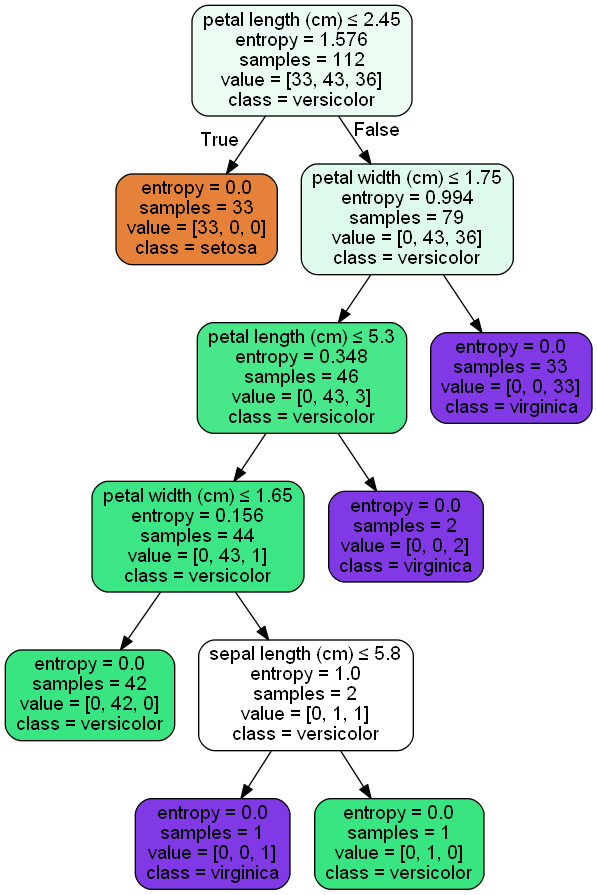

In [12]:
from IPython.display import Image
Image(graph.create_png())